### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
import os
# os.getcwd()

### Uploading the dataset

In [3]:
attrdata = pd.read_csv(r"F:\DSA UDEMY\attrition\Table_1.csv")

In [4]:
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [5]:
attrdata.shape

(902, 16)

In [6]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [7]:
attrdata.rename(columns = {'Experience (YY.MM)':'Experience'}, inplace = True)
attrdata.rename(columns = {'phone number ':'phone_num'}, inplace = True)
attrdata.rename(columns = {'Emp. Group':'Emp_Group'}, inplace = True)
attrdata.rename(columns = {'Tenure Grp.':'Tenure_Grp'}, inplace = True)
attrdata.rename(columns = {'Marital Status':'Marital_Status'}, inplace = True)

attrdata.rename(columns = {'Age in YY.':'Age_in_years'}, inplace = True)
attrdata.rename(columns = {'Hiring Source':'Hiring_Source'}, inplace = True)
attrdata.rename(columns = {'Promoted/Non Promoted':'Promoted_Non_Promoted'}, inplace = True)
attrdata.rename(columns = {'Job Role Match':'Job_Role_Match'}, inplace = True)
attrdata.rename(columns = {'Stay/Left':'Stay_Left'}, inplace = True)

### Performing Imputation for Missing Values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

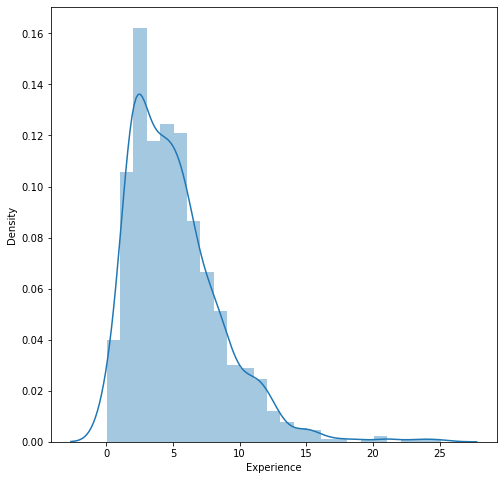

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(attrdata.Experience)

In [9]:
attrdata['Experience'].fillna(attrdata['Experience'].median(),inplace=True)

In [10]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp_Group                0
Function                 0
Gender                   0
Tenure                   0
Tenure_Grp               0
Experience               0
Marital_Status           0
Age_in_years             0
Hiring_Source            0
Promoted_Non_Promoted    0
Job_Role_Match           2
Stay_Left                0
dtype: int64

In [11]:
#Job Role Match
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Job_Role_Match"].apply(Job)
attrdata['New_Job_Role_Match'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,Marital_Status,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Job_Role_Match,Stay_Left,New_Job_Role_Match
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,1
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New_Job_Role_Match', ylabel='Density'>

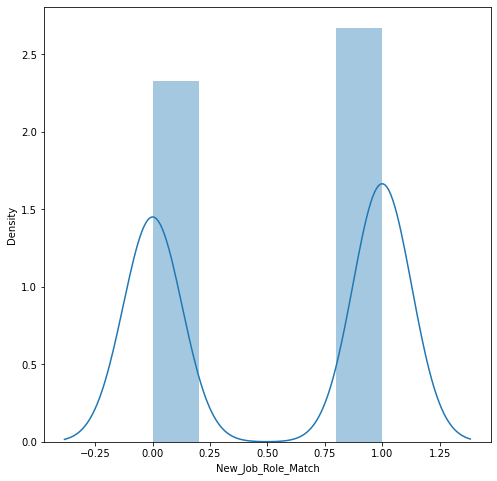

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(attrdata.New_Job_Role_Match)

In [13]:
attrdata['New_Job_Role_Match'].fillna(attrdata['New_Job_Role_Match'].max(),inplace=True)

### Dropping the missing values (another way to deal with missing values)

In [14]:
#attrdata.dropna(axis=0,inplace=True)

In [15]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp_Group                0
Function                 0
Gender                   0
Tenure                   0
Tenure_Grp               0
Experience               0
Marital_Status           0
Age_in_years             0
Hiring_Source            0
Promoted_Non_Promoted    0
Job_Role_Match           2
Stay_Left                0
New_Job_Role_Match       0
dtype: int64

In [16]:
attrdata.drop('Job_Role_Match', axis = 1, inplace = True)

### Performing Exploratory Data Analysis

In [17]:
gender_dict = attrdata["Gender "].value_counts()
gender_dict

Male      659
Female    237
other       6
Name: Gender , dtype: int64

<AxesSubplot:xlabel='Gender ', ylabel='count'>

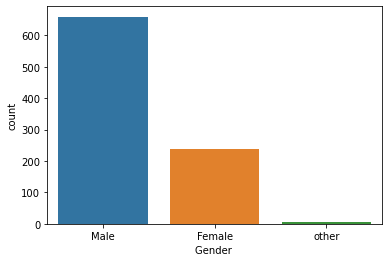

In [18]:
sns.countplot(x ='Gender ', data = attrdata)

In [19]:
promoted_dict = attrdata["Promoted_Non_Promoted"].value_counts()
promoted_dict

Promoted        459
Non Promoted    443
Name: Promoted_Non_Promoted, dtype: int64

<AxesSubplot:xlabel='Promoted_Non_Promoted', ylabel='count'>

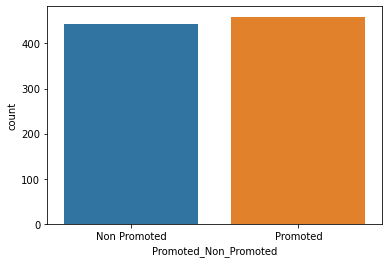

In [20]:
sns.countplot(x ='Promoted_Non_Promoted', data = attrdata)

In [21]:
func_dict = attrdata["Function"].value_counts()
func_dict

Operation    838
Support       52
Sales         12
Name: Function, dtype: int64

<AxesSubplot:xlabel='Function', ylabel='count'>

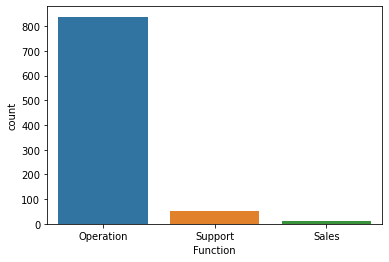

In [22]:
sns.countplot(x ='Function', data = attrdata)

In [23]:
Hiring_dict = attrdata["Hiring_Source"].value_counts()
Hiring_dict

Direct               715
Agency               116
Employee Referral     71
Name: Hiring_Source, dtype: int64

<AxesSubplot:xlabel='Hiring_Source', ylabel='count'>

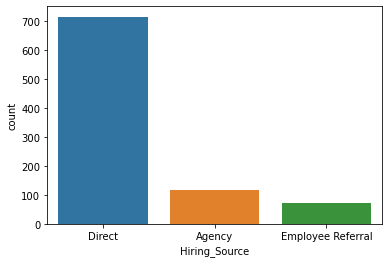

In [24]:
sns.countplot(x ='Hiring_Source', data = attrdata)

In [25]:
Marital_dict = attrdata["Marital_Status"].value_counts()
print(Marital_dict)

Single    536
Marr.     356
NTBD        6
Div.        2
Sep.        2
Name: Marital_Status, dtype: int64


In [26]:
Emp_dict = attrdata["Emp_Group"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)

B1             543
B2             276
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: Emp_Group, dtype: int64


In [27]:
job_dict = attrdata["New_Job_Role_Match"].value_counts()
job_dict

1    482
0    420
Name: New_Job_Role_Match, dtype: int64

<AxesSubplot:xlabel='New_Job_Role_Match', ylabel='count'>

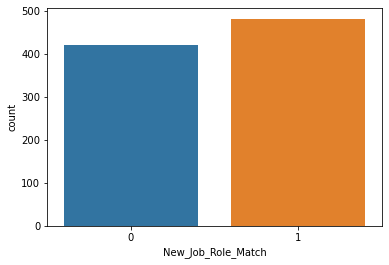

In [28]:
sns.countplot(x ='New_Job_Role_Match', data = attrdata)

In [29]:
tenure_dict = attrdata["Tenure_Grp"].value_counts()
print(tenure_dict)

> 1 & < =3    626
< =1          276
Name: Tenure_Grp, dtype: int64


<AxesSubplot:xlabel='Tenure_Grp', ylabel='count'>

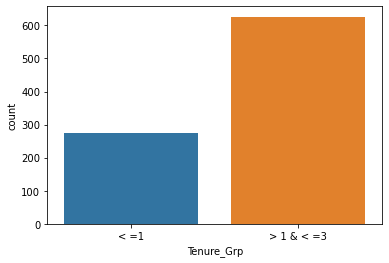

In [30]:
sns.countplot(x ='Tenure_Grp', data = attrdata)

In [31]:
# Build new dictionary to be used to categorize data column after
location_dict = attrdata["Location"].value_counts()
print(location_dict)

location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':         0,
}

print(location_dict_new)

Chennai       255
Noida         236
Bangalore     210
Hyderabad      66
Pune           56
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      8
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64
{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


In [32]:
print(location_dict_new.keys())

dict_keys(['Chennai', 'Noida', 'Bangalore', 'Hyderabad', 'Pune', 'Madurai', 'Lucknow', 'other place'])


In [33]:
def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']
    
data_l = attrdata["Location"].apply(location)
attrdata['New Location'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,Marital_Status,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Stay_Left,New_Job_Role_Match,New Location
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Left,1,3
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,Stay,0,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Stay,1,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Stay,1,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Stay,1,1


In [34]:
gen = pd.get_dummies(attrdata["Function"])
print(gen)

     Operation  Sales  Support
0            1      0        0
1            0      0        1
2            1      0        0
3            1      0        0
4            1      0        0
..         ...    ...      ...
897          1      0        0
898          1      0        0
899          1      0        0
900          1      0        0
901          1      0        0

[902 rows x 3 columns]


<AxesSubplot:xlabel='Function', ylabel='count'>

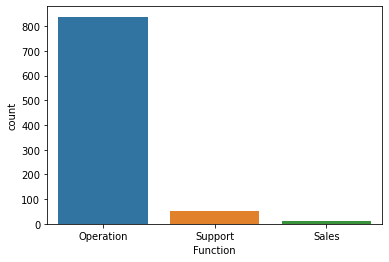

In [35]:
sns.countplot(x ='Function', data = attrdata)

In [36]:
hr = pd.get_dummies(attrdata["Hiring_Source"])

In [37]:
print(pd.get_dummies(attrdata["Hiring_Source"]))

     Agency  Direct  Employee Referral
0         0       1                  0
1         0       1                  0
2         0       1                  0
3         0       1                  0
4         0       1                  0
..      ...     ...                ...
897       0       1                  0
898       0       1                  0
899       0       1                  0
900       0       1                  0
901       0       1                  0

[902 rows x 3 columns]


In [38]:
# Marital Status
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'
    
data_l = attrdata["Marital_Status"].apply(Mar)
attrdata['New_Marital'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,Marital_Status,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Stay_Left,New_Job_Role_Match,New Location,New_Marital
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Left,1,3,Single
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,Stay,0,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Stay,1,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Stay,1,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Stay,1,1,Marr.


In [39]:
Mr = pd.get_dummies(attrdata["New_Marital"])
print(Mr)

     Marr.  Single  other status
0        0       1             0
1        1       0             0
2        1       0             0
3        1       0             0
4        1       0             0
..     ...     ...           ...
897      0       1             0
898      0       1             0
899      0       1             0
900      0       1             0
901      1       0             0

[902 rows x 3 columns]


In [40]:
#Promoted/Not Promoted
def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Promoted_Non_Promoted"].apply(Promoted)
attrdata['New_Promotion'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,Marital_Status,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Stay_Left,New_Job_Role_Match,New Location,New_Marital,New_Promotion
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Left,1,3,Single,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,Stay,0,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Stay,1,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Stay,1,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Stay,1,1,Marr.,0


In [41]:
# Employee Group
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}


def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
    
data_l = attrdata["Emp_Group"].apply(emp)
attrdata['New_EMP'] = data_l

emp = pd.get_dummies(attrdata["New_EMP"])
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,Marital_Status,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Stay_Left,New_Job_Role_Match,New Location,New_Marital,New_Promotion,New_EMP
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Left,1,3,Single,0,B2
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,Stay,0,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Stay,1,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Stay,1,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Stay,1,1,Marr.,0,B2


In [42]:
# Gender
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'
    
data_l = attrdata["Gender "].apply(Gen)
attrdata['New_Gender'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,...,Age_in_years,Hiring_Source,Promoted_Non_Promoted,Stay_Left,New_Job_Role_Match,New Location,New_Marital,New_Promotion,New_EMP,New_Gender
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,27.12,Direct,Non Promoted,Left,1,3,Single,0,B2,Male
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,Stay,0,6,Marr.,1,other group,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Stay,1,5,Marr.,1,B3,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Stay,1,6,Marr.,1,B2,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Stay,1,1,Marr.,0,B2,Male


In [43]:
gend = pd.get_dummies(attrdata["New_Gender"])

In [44]:
tengrp = pd.get_dummies(attrdata["Tenure_Grp"])

In [45]:
dataset = pd.concat([attrdata, hr, Mr, emp, tengrp, gen, gend], axis = 1)

In [46]:
dataset.head()

,table id,name,phone number,Location,Emp_Group,Function,Gender,Tenure,Tenure_Grp,Experience,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,0,0,1,0,1,0,0,0,1,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,0,1,1,0,0,0,1,0,1,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,1,0,1,0,1,0,0,0,1,0
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,0,0,1,0,1,0,0,0,1,0
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,0,0,1,0,1,0,0,0,1,0


In [47]:
dataset.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp_Group', 'Function',
       'Gender ', 'Tenure', 'Tenure_Grp', 'Experience', 'Marital_Status',
       'Age_in_years', 'Hiring_Source', 'Promoted_Non_Promoted', 'Stay_Left',
       'New_Job_Role_Match', 'New Location', 'New_Marital', 'New_Promotion',
       'New_EMP', 'New_Gender', 'Agency', 'Direct', 'Employee Referral',
       'Marr.', 'Single', 'other status', 'B1', 'B2', 'B3', 'other group',
       '< =1', '> 1 & < =3', 'Operation', 'Sales', 'Support', 'Female', 'Male',
       'other'],
      dtype='object')

In [48]:
dataset.drop(["table id", "name", "Marital_Status","Promoted_Non_Promoted","Function","Emp_Group","Location"
              ,"Hiring_Source","Gender ", 'Tenure', 'New_Gender', 'New_Marital', 'New_EMP'],axis=1,inplace=True)

In [49]:
dataset1 = dataset.drop(['phone number','Tenure_Grp'],axis=1)

In [50]:
dataset1.head()

,Experience,Age_in_years,Stay_Left,New_Job_Role_Match,New Location,New_Promotion,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,6.08,27.12,Left,1,3,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,13.00,38.08,Stay,0,6,1,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
2,16.05,36.04,Stay,1,5,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
3,6.06,32.07,Stay,1,6,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,7.00,32.05,Stay,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [52]:
# Target 

def Target(x):
    if x in "Stay":
        return int(1)
    else:
        return int(0)
    
data_l = dataset1["Stay_Left"].apply(Target)
dataset1['Stay_Left'] = data_l

dataset1['Stay_Left'].head()

0    0
1    1
2    1
3    1
4    1
Name: Stay_Left, dtype: int64

In [53]:
dataset1.to_csv("processed table.csv")

In [54]:
dataset = pd.read_csv("processed table.csv")
dataset = pd.DataFrame(dataset)

In [55]:
dataset.head()

,Unnamed: 0,Experience,Age_in_years,Stay_Left,New_Job_Role_Match,New Location,New_Promotion,Agency,Direct,Employee Referral,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
0,0,6.08,27.12,0,1,3,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,1,13.00,38.08,1,0,6,1,0,1,0,...,0,1,1,0,0,0,1,0,1,0
2,2,16.05,36.04,1,1,5,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
3,3,6.06,32.07,1,1,6,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,4,7.00,32.05,1,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [56]:
col = dataset.columns
print(col)

Index(['Unnamed: 0', 'Experience', 'Age_in_years', 'Stay_Left',
       'New_Job_Role_Match', 'New Location', 'New_Promotion', 'Agency',
       'Direct', 'Employee Referral', 'Marr.', 'Single', 'other status', 'B1',
       'B2', 'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')


In [57]:
print(dataset.corr())

                    Unnamed: 0  Experience  Age_in_years  Stay_Left  \
Unnamed: 0            1.000000   -0.071234     -0.113317   0.014011   
Experience           -0.071234    1.000000      0.834509   0.205991   
Age_in_years         -0.113317    0.834509      1.000000   0.206722   
Stay_Left             0.014011    0.205991      0.206722   1.000000   
New_Job_Role_Match    0.075523    0.005913      0.006287   0.673716   
New Location          0.091208    0.020428     -0.021362   0.009492   
New_Promotion        -0.013895    0.046586      0.020003  -0.127807   
Agency               -0.058481    0.132969      0.142276  -0.067483   
Direct               -0.019656   -0.214478     -0.200112  -0.019865   
Employee Referral     0.102288    0.157574      0.124379   0.113793   
Marr.                -0.030793    0.526540      0.581594   0.243233   
Single                0.042080   -0.524880     -0.586896  -0.243986   
other status         -0.053594    0.003570      0.037405   0.008777   
B1    

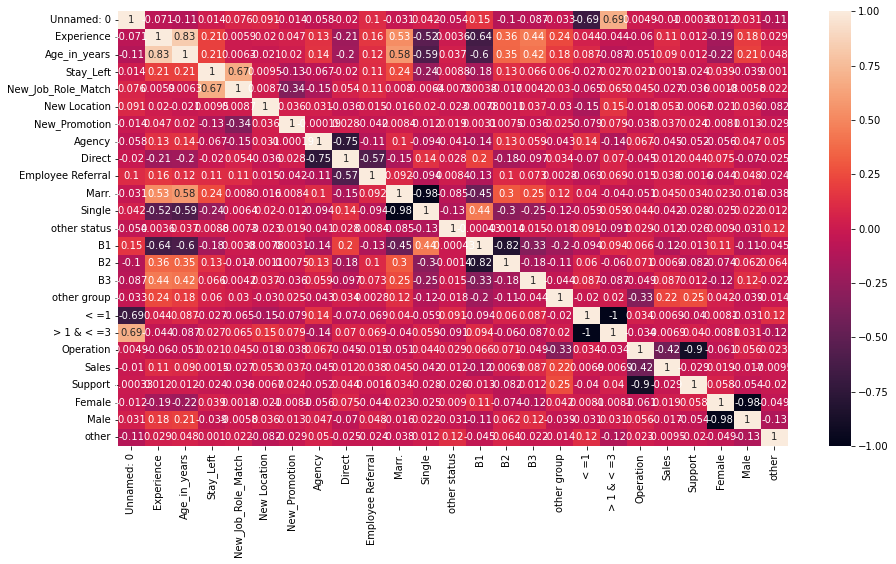

In [58]:
plt.figure(figsize = (15,8))
dataplot = sns.heatmap(dataset.corr(),annot=True) # annot = False , this won't gave us the number

### Normalization 

In [59]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(d, columns=col)
print(scaled_df.head())

   Unnamed: 0  Experience  Age_in_years  Stay_Left  New_Job_Role_Match  \
0     0.00000    0.241517      0.195743        0.0                 1.0   
1     0.00111    0.517764      0.549178        1.0                 0.0   
2     0.00222    0.639521      0.483392        1.0                 1.0   
3     0.00333    0.240719      0.355369        1.0                 1.0   
4     0.00444    0.278244      0.354724        1.0                 1.0   

   New Location  New_Promotion  Agency  Direct  Employee Referral  ...   B3  \
0      0.428571            0.0     0.0     1.0                0.0  ...  0.0   
1      0.857143            1.0     0.0     1.0                0.0  ...  0.0   
2      0.714286            1.0     0.0     1.0                0.0  ...  1.0   
3      0.857143            1.0     0.0     1.0                0.0  ...  0.0   
4      0.142857            0.0     0.0     1.0                0.0  ...  0.0   

   other group  < =1  > 1 & < =3  Operation  Sales  Support  Female  Male  \
0  

### Standardization

In [60]:
#from sklearn.preprocessing import StandardScaler
#scale= StandardScaler()
# separate the independent and dependent variables
#y = scaled_df["Stay/Left"]
#X = scaled_df.drop("Stay/Left",axis=1)
# standardization of dependent variables
#scaled_data = scale.fit_transform(X) 
#print(scaled_data)

### Dependent and Independent Features

In [62]:
y = scaled_df["Stay_Left"]
X = scaled_df.drop("Stay_Left",axis=1)

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [64]:
X_train

,Unnamed: 0,Experience,Age_in_years,New_Job_Role_Match,New Location,New_Promotion,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
215,0.238624,0.358882,0.388262,1.0,0.857143,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
401,0.445061,0.161677,0.194453,1.0,0.571429,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
413,0.458380,0.162076,0.225734,1.0,0.857143,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
490,0.543840,0.082635,0.130281,1.0,0.714286,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
874,0.970033,0.199202,0.258304,0.0,0.428571,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.995560,0.000000,0.001290,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
709,0.786903,0.919361,0.836827,1.0,0.857143,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
439,0.487236,0.281437,0.224766,0.0,0.714286,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
174,0.193119,0.079042,0.097710,1.0,0.857143,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Importing the algorithms

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()

In [67]:
for a,b in zip([lr,dt,rm,gnb],["Logistic Regression","Decision Tree","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.884882
[Logistic Regression] test data accuracy is : 0.856354
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.834254
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.845304
[Naive Bayes] training data accuracy is : 0.864078
[Naive Bayes] test data accuracy is : 0.817680


### Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
print('Logistic Regression: ',cross_val_score(lr, X, y, cv=10, scoring ='accuracy').mean())
print('Decision Tree: ',cross_val_score(dt, X, y, cv=10, scoring ='accuracy').mean())
print('Random Forest: ',cross_val_score(rm, X, y, cv=10, scoring ='accuracy').mean())
print('Naive Bayes: ',cross_val_score(gnb, X, y, cv=10, scoring ='accuracy').mean())

Logistic Regression:  0.8747008547008546
Decision Tree:  0.8436874236874237
Random Forest:  0.8846886446886447
Naive Bayes:  0.8470573870573871
